In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt
import random

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [24]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [25]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
#X_train = X_train.reshape(-1, 28*28).astype("float32") / 255.0
#X_test = X_test.reshape(-1, 28*28).astype("float32") / 255.0

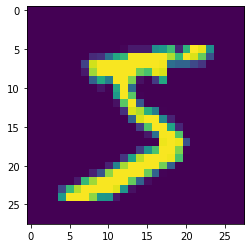

In [19]:
plt.imshow(X_train[0])

In [28]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu',kernel_initializer='he_uniform'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               460900    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [30]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 15s 6ms/step - loss: 0.1493 - accuracy: 0.9547 - val_loss: 0.0599 - val_accuracy: 0.9825
Epoch 2/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0523 - val_accuracy: 0.9849
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0521 - val_accuracy: 0.9866
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0504 - val_accuracy: 0.9865
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.0594 - val_accuracy: 0.9868 2s - loss: 0.020 - ETA: 0s - loss: 0.0


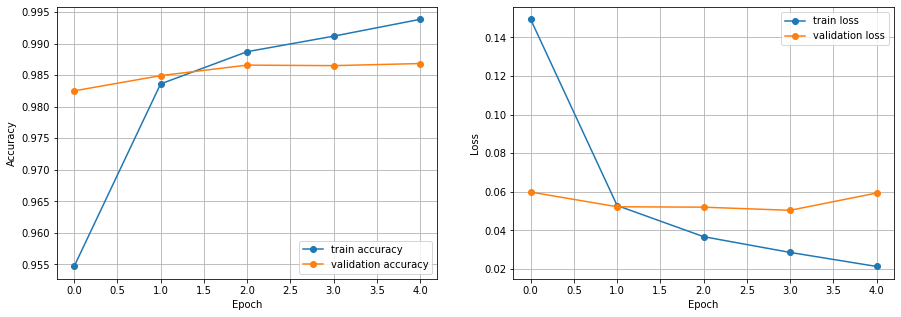

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [32]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.0460 - accuracy: 0.9885

Test Accuracy: 0.9884999990463257

Test Loss: 0.046036213636398315


In [33]:
predictions = model.predict(X_test)

In [34]:
predictions[0]

array([4.4568932e-14, 5.1567209e-11, 1.3080066e-09, 1.3305872e-10,
       1.1541617e-17, 4.3609800e-14, 4.5089475e-18, 1.0000000e+00,
       1.3878828e-12, 3.2544578e-10], dtype=float32)

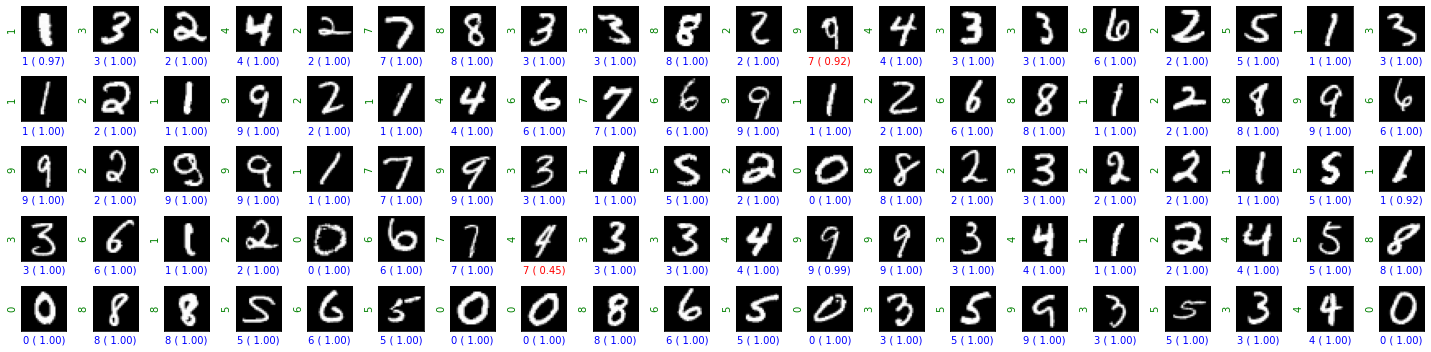

In [38]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()